# The_Donald subreddit Nov 2016 vs Nov 2017

A comparrison of the subreddit dedicated to the Donald in the month of the American election vs one year later. 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
analyser = SentimentIntensityAnalyzer() #http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf

In [14]:
data16 = pd.read_csv(r"D:\Data_sets\Reddit\The_Donald_nov16.csv")
data17 = pd.read_csv(r"D:\Data_sets\Reddit\The_Donald_nov17.csv")

Data available on Google bigquery: https://bigquery.cloud.google.com/dataset/fh-bigquery:reddit_comments

In [25]:
data16.columns

Index(['created_utc', 'author', 'num_comments', 'score', 'ups', 'downs',
       'title', 'selftext', 'date', 'T_sentiment', 'ST_sentiment', 'T_pos',
       'T_neg', 'T_neu', 'T_compound', 'ST_pos', 'ST_neg', 'ST_neu',
       'ST_compound'],
      dtype='object')

In [16]:
def cleaner(text):
    if type(text) == str:
        return text
    else:
        return '[removed]'

In [21]:
def pre_process(dat):
    data = dat.copy()
    data['title'] = data['title'].apply(cleaner)
    data['selftext'] = data['selftext'].apply(cleaner) #remove non-strings
    data = data[data['selftext'] != '[removed]'] #remove deleted posts
    data.loc[:,'created_utc'] = pd.to_datetime(data['created_utc'],unit='s') #convert datetime column
    data['date']= data['created_utc'].apply(lambda x: x.date()) # pure dates

    data['T_sentiment'] = data['title'].apply(analyser.polarity_scores) #sentiment scores https://github.com/cjhutto/vaderSentiment
    data['ST_sentiment'] = data['selftext'].apply(analyser.polarity_scores)

    for i in ['pos', 'neg', 'neu', 'compound']:
        data['T_'+i] = data['T_sentiment'].apply(lambda x: x[i]) #new columns for each element of sentiment score for title.

    for i in ['pos', 'neg', 'neu', 'compound']:
        data['ST_'+i] = data['ST_sentiment'].apply(lambda x: x[i]) #new columns for each element of sentiment score for selftext.  
        
    return data

In [ ]:
data16 = pre_process(data16)
data17 = pre_process(data17)

In [35]:
posts_in_16 = data16.shape[0] 
posts_in_17 = data17.shape[0]

In [107]:
def comparison_plot(Nov16, Nov17, ytitle, title):
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()

    rects1 = ax.bar(0+width/2, Nov16, width,
                    color='SkyBlue', label='16')
    rects2 = ax.bar(0+width*1.5, Nov17, width,
                    color='IndianRed', label='17')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ytitle)
    ax.set_xlabel('Date')
    ax.set_title(title)
    ax.set_xbound(-0.1,0.5)
    ax.set_xticks((0.1,0.3))
    ax.set_xticklabels(('Nov 16','Nov 17'))
    ax.legend();

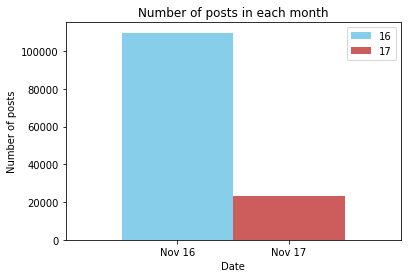

In [108]:
comparison_plot(posts_in_16, posts_in_17,'Number of posts', 'Number of posts in each month')

# Post title sentiment distribution

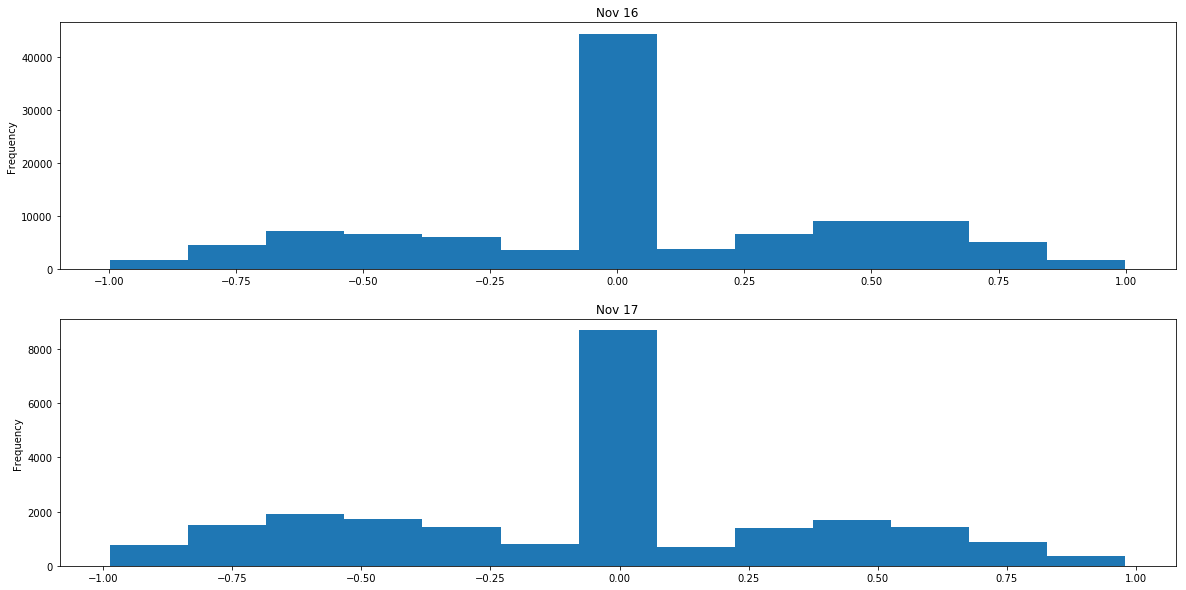

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data16['T_compound'].plot(kind='hist', bins=13, figsize=(20,10), title = 'Nov 16', ax=axes[0]);
data17['T_compound'].plot(kind='hist', bins=13, figsize=(20,10), title = 'Nov 17', ax=axes[1]);

#### Post titles sentiments 16

In [121]:
sent_16_mean = data16['T_compound'].mean()
sent_16_mean

0.025366496527333422

In [126]:
sent_16_std = data16['T_compound'].std()
sent_16_std

0.4207231175042343

#### Post titles sentiments 17

In [127]:
sent_17_mean = data17['T_compound'].mean()
sent_17_mean

-0.05341539351355966

In [128]:
sent_17_std = data17['T_compound'].std()
sent_17_std

0.43670500717945415

Average post title sentiment.

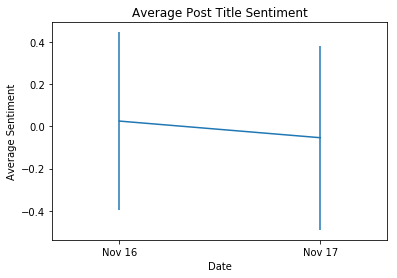

In [131]:
fig, ax = plt.subplots()
ax.errorbar([0.2,0.8], [sent_16_mean, sent_17_mean], yerr=[sent_16_std, sent_17_std])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Sentiment')
ax.set_xlabel('Date')
ax.set_title('Average Post Title Sentiment')
ax.set_xbound(0,1)
ax.set_xticks((0.2,0.8))
ax.set_xticklabels(('Nov 16','Nov 17'));

# Self text distribution

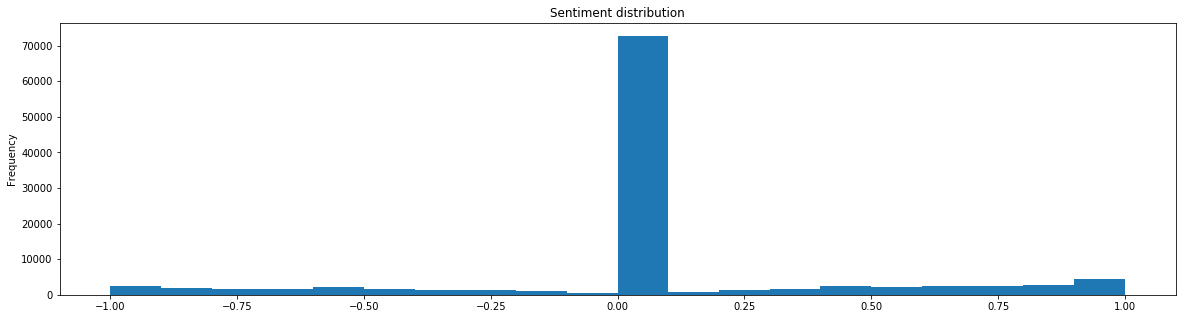

In [23]:
data['ST_compound'].plot(kind='hist', bins=20, figsize=(20,5), title = 'Sentiment distribution');

# Title score vs sentiment

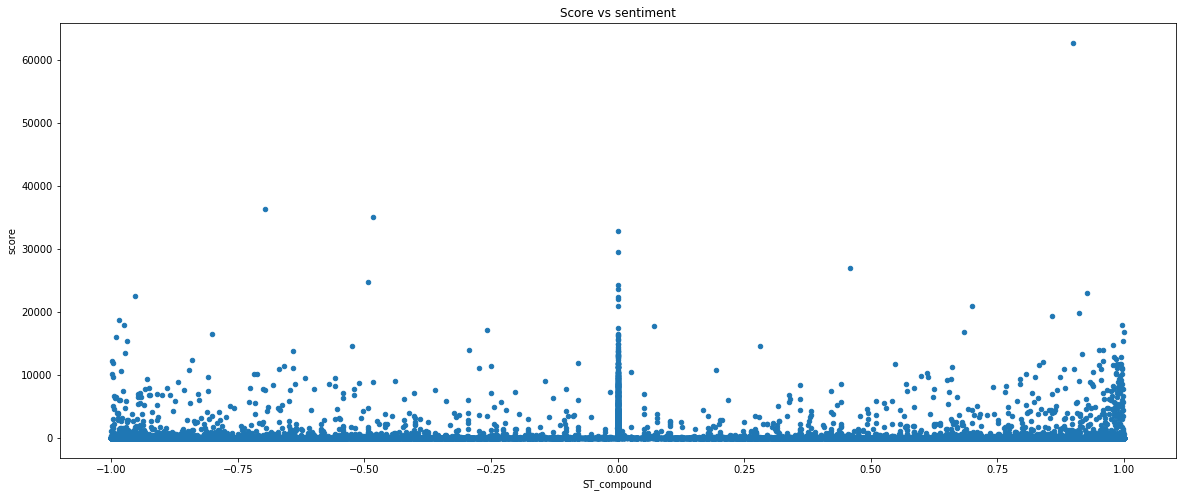

In [20]:
data.plot(kind='scatter', y='score',x='T_compound', figsize=(20,8), title='Score vs sentiment');

# Self text score vs sentiment

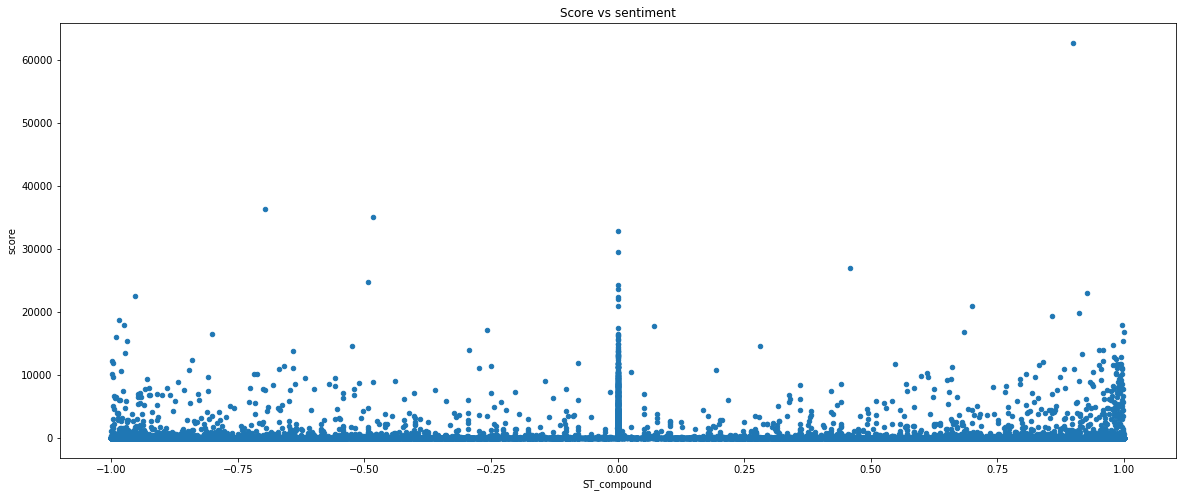

In [24]:
data.plot(kind='scatter', y='score',x='ST_compound', figsize=(20,8), title='Score vs sentiment');

# Positive Titles

In [9]:
data[data['T_pos'] > 0.8]['title'] #Good examples including hearts in row 62065

186                                         Congratulations
275                                                  Please
317                                      Please God Emporer
341                                                Winning!
4340                                                    lol
4395                                                    Lol
4774                                               Winning!
6271                                         Super thrilled
6407                                 WE WON. Thank you God!
6745                                      Good luck, pedes.
10432     I WANT JUSTICE ALREAD-EEEEEEEEEEEEEEEEEEEEEEEE...
10441                                           Interesting
10460                                                   wow
10911                                                  Neat
11274                                 Winners beget winners
11310                                         HAPPY 300,000
12114                                   

# Negative titles

In [10]:
data[data['T_neg'] > 0.80]['title']

4653                                STOP DEMOCRAT VIOLENCE!
4663                                       Fight, Meme, Die
5250                                              Seriously
5876                                                   Rape
10353                                    THE RETARDED WITCH
10594                                           Unfortunate
10879                                            Scary Shit
12040                              Ignore this anxious rant
16080                                         Scumbag Left.
16325                                                  Wtf?
16800                                                 Awful
17076             GOODBYE, YOU LAZY WORTHLESS MOTHERFUCKER.
17577                                  Fake violence surge!
17998                                           HOLY SHIT!!
18025     NAH NAH NAH NAH, NAH NAH NAH NAH! HEY! HEEEY! ...
21915                                                  Shit
21972                                   

# Positive post text

In [11]:
data[data['ST_pos'] > 0.7]['selftext']

158                                                     Lol
171                                       God Bless America
225                                            interesting 
361                                              feels good
399                                  That was pretty funny.
476                                    CONGRATS TRUMPSTUMPS
499                                                I smile?
712                                             Ready, GO!!
813                                             Feels good!
897                                            HIGH ENERGY!
5861                                                Thanks!
5918                                       Super important!
6345                                                   Lulz
6410                                      WOO LADS! WE WON!
6446                                  Libertarians rejoice!
6474                                                    lol
6499                                    

# Negative post text

In [12]:
data[data['ST_neg'] > 0.7]['selftext'][:3]

67     and a dipshit
445     Stupid media
583        Fuck off.
Name: selftext, dtype: object

# Top scoring posts

In [13]:
data.sort_values(by='score', ascending=False)['title'].iloc[:20].iloc[11]

'As a moderator of large subreddits who hates The_Donald but hates censorship even more, I stand with you.'

# Top posters

In [14]:
data['author'].value_counts().iloc[:10]

[deleted]           61127
NotNolan              191
RlzJohnnyM            145
cynicsrising          128
mrPoorRichard         126
AIsuicide             118
qaaqa                 104
NorthJersey908        102
Cuck-WTF               94
LightBringerFlex       89
Name: author, dtype: int64

In [15]:
#data[data['author']=='scout77'] #Nov 16 top posters

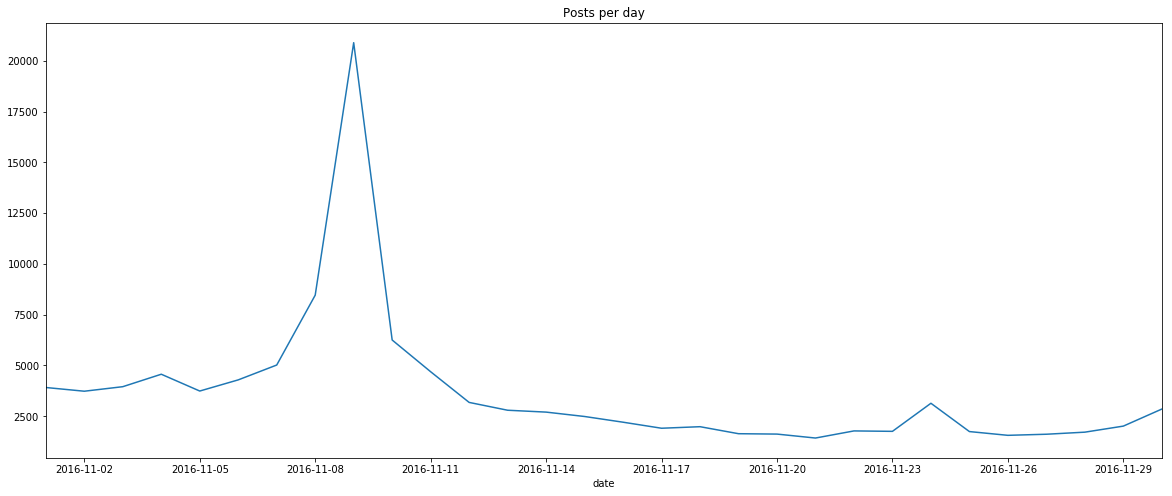

In [16]:
data.groupby('date')['created_utc'].count().plot(figsize =(20,8), title='Posts per day');

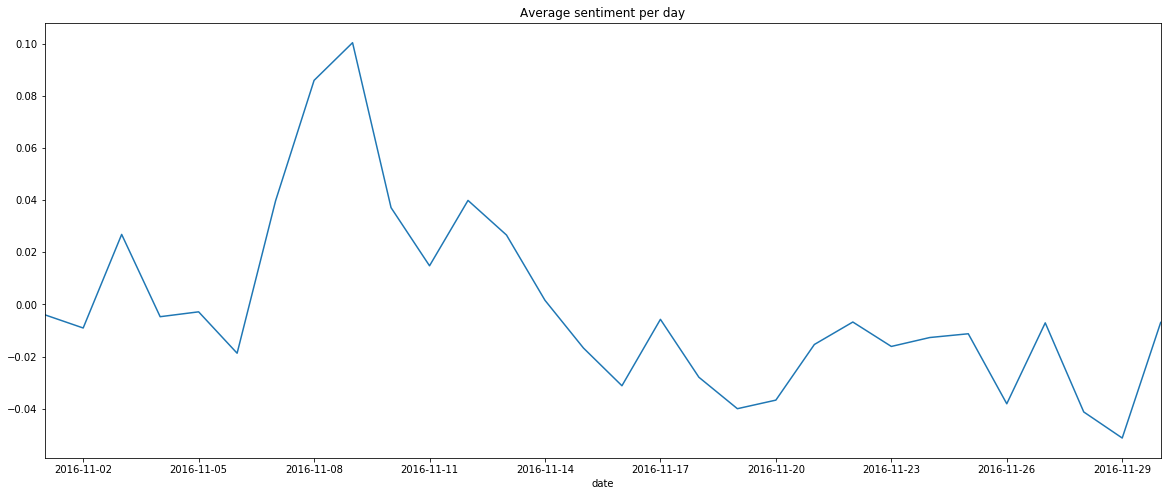

In [17]:
data.groupby('date')['T_compound'].mean().plot(figsize =(20,8), title='Average sentiment per day');